In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import reuters
from tensorflow.keras.layers import Embedding,LSTM,Bidirectional,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [4]:
# data = reuters.load_data()
# (X_train,y_train),(y_train,y_test) = data
data = pd.read_csv('medium_data.csv')
data['title']
print(data.shape)

(6508, 10)


In [5]:
# corpus = [
#     "I love programming",
#     "Programming languages are fascinating",
#     "Machine learning is a powerful tool",
#     "I enjoy solving coding problems",
#     "Learning new things is always exciting",
#     "Python is a versatile language",
#     "Data analysis is an essential skill",
#     "I like building applications",
#     "Coding challenges improve problem-solving skills",
#     "Artificial intelligence is shaping the future",
# ]

In [6]:
data ['title'] = data['title'].apply(lambda x: x.replace(u'\xa0',u' ').replace('\u200a',' '))

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['title'])
total_words = len(tokenizer.word_index) + 1

print("Total number of words: ", total_words)

Total number of words:  8237


In [7]:
input_sequences = []

for line in data['title']:
  # print(line)
  token_list = tokenizer.texts_to_sequences([line])[0]
  # print(token_list)
  for i in range(1,len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

# input_sequences
print("total input sequences:",len(input_sequences))

total input sequences: 48461


In [8]:
# input_sequences = np.array(input_sequences)
max_sequence_length = max(len(seq) for seq in input_sequences)
print("Max Sequence Length:", max_sequence_length)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre'))
X,y = input_sequences[:,:-1],input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes = total_words)

# X, y = input_sequences[:, :-1], input_sequences[:, -1]
# X = [seq[:-1] for seq in input_sequences]
# y = [seq[-1] for seq in input_sequences]



Max Sequence Length: 40


In [9]:
# import numpy as np
# for i in range(len(X)):  # Print the first 5 samples or all if less than 5
#     x_text = ' '.join(tokenizer.index_word[idx] for idx in X[i] if idx != 0)
#     y_text = tokenizer.index_word[y[i]]
#     print(f"X: {x_text.ljust(30)} | y: {y_text}")

In [10]:
model = Sequential()
model.add(Embedding(total_words,100,input_length= max_sequence_length-1 ))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words,activation = 'softmax'))
adam = Adam(learning_rate= 0.01)
model.compile(optimizer =adam, loss ='categorical_crossentropy',metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 39, 100)           823700    
                                                                 
 bidirectional (Bidirectiona  (None, 300)              301200    
 l)                                                              
                                                                 
 dense (Dense)               (None, 8237)              2479337   
                                                                 
Total params: 3,604,237
Trainable params: 3,604,237
Non-trainable params: 0
_________________________________________________________________


In [17]:
model1 = Sequential()
model1.add(Embedding(total_words,100,input_length= max_sequence_length-1 ))
model1.add(Bidirectional(LSTM(150)))
model1.add(Dense(total_words,activation = 'softmax'))
adam = Adam(learning_rate= 0.01)
model1.compile(optimizer =adam, loss ='categorical_crossentropy',metrics= ['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 39, 100)           823700    
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              301200    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 8237)              2479337   
                                                                 
Total params: 3,604,237
Trainable params: 3,604,237
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(X,y,epochs =50,verbose=1)
print(model)

In [18]:
!nvidia.sim

/bin/bash: line 1: nvidia.sim: command not found


In [11]:
history = model.fit(X,y,epochs =50,verbose=1)
print(model)

Epoch 1/50
1515/1515 [==============================] - 370s 240ms/step - loss: 6.7789 - accuracy: 0.1261
Epoch 2/50
1515/1515 [==============================] - 348s 230ms/step - loss: 5.7852 - accuracy: 0.1752
Epoch 3/50
1515/1515 [==============================] - 348s 229ms/step - loss: 4.9706 - accuracy: 0.2046
Epoch 4/50
1515/1515 [==============================] - 348s 230ms/step - loss: 4.2128 - accuracy: 0.2451
Epoch 5/50
1515/1515 [==============================] - 357s 236ms/step - loss: 3.6665 - accuracy: 0.2985
Epoch 6/50
1515/1515 [==============================] - 344s 227ms/step - loss: 3.3007 - accuracy: 0.3358
Epoch 7/50
1515/1515 [==============================] - 340s 225ms/step - loss: 3.0519 - accuracy: 0.3683
Epoch 8/50
1515/1515 [==============================] - 341s 225ms/step - loss: 2.8857 - accuracy: 0.3896
Epoch 9/50
1515/1515 [==============================] - 341s 225ms/step - loss: 2.7668 - accuracy: 0.4043
Epoch 10/50
1515/1515 [=======================

In [12]:
history

In [13]:
import h5py
model_filename = 'next_wrod_pred_model.h5'
model.save(model_filename)

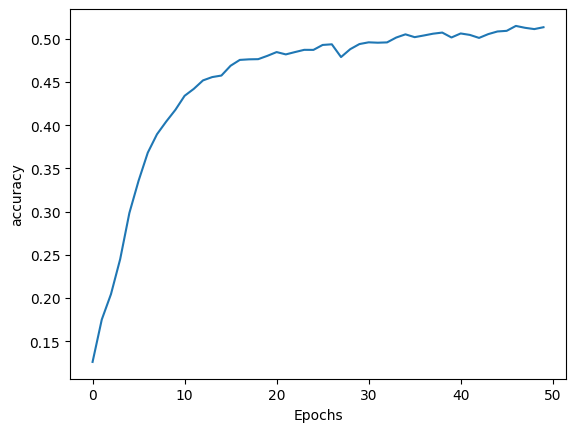

In [14]:
def plot_graphs(history,metric):
  plt.plot(history.history[metric])
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.show()

plot_graphs(history,'accuracy')

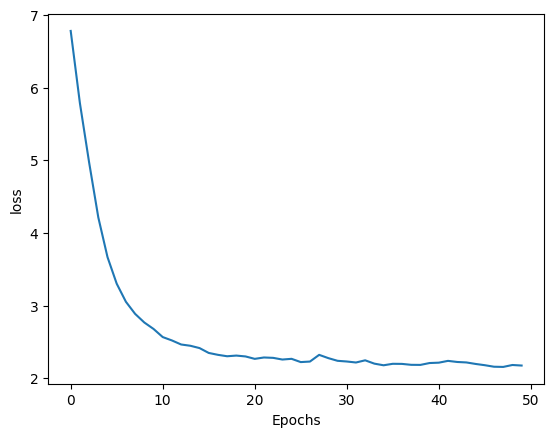

In [15]:
plot_graphs(history,'loss')

In [16]:
def predict_next_word(seed_text, model, tokenizer, max_sequence_length):
    for _ in range(3):  # Predict the next 3 words
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)[0]
        predicted_id = np.argmax(predicted_probs)
        predicted_word = tokenizer.index_word[predicted_id]
        seed_text += " " + predicted_word
    return seed_text

seed_text = "hypothesis"
predicted_text = predict_next_word(seed_text, model, tokenizer, max_sequence_length)
print("Seed text:", seed_text)
print("Predicted next words:", predicted_text)


Seed text: hypothesis
Predicted next words: hypothesis testing glossary for


In [ ]:
# corpus = [
#     "I enjoy solving coding problems",
#     "Machine learning opens new possibilities",
#     "Programming languages shape our digital world",
#     "Data analysis drives informed decisions",
#     "I love exploring innovative solutions",
#     "Artificial intelligence revolutionizes industries",
#     "Python empowers developers with flexibility",
#     "Learning new skills broadens horizons",
#     "Coding challenges enhance problem-solving abilities",
#     "Innovation in technology fuels progress",
#     "I like building creative applications",
#     "Programming is a journey of continuous learning",
#     "Machine learning algorithms unlock insights",
#     "Data analysis uncovers hidden patterns",
#     "Artificial intelligence reshapes business landscapes",
#     "I enjoy the art of coding",
#     "Python simplifies complex tasks",
#     "Learning and growing in the tech field",
#     "Programming languages evolve with time",
#     "Challenges in coding foster resilience",
#     "Innovative solutions drive technological advancements",
#     "Machine learning transforms raw data into knowledge",
#     "Data analysis guides strategic decision-making",
#     "Artificial intelligence enhances human capabilities",
#     "I like creating software that makes a difference",
#     "Exploring the depths of coding possibilities",
#     "Python, a language of endless potential",
#     "Learning from challenges accelerates personal growth",
#     "Programming languages, a means of expression",
#     "Machine learning, the science of prediction",
#     "Data analysis, the key to actionable insights",
#     "Artificial intelligence, a catalyst for change",
#     "I enjoy the challenge of coding puzzles",
#     "Python, a versatile and powerful language",
#     "Learning coding principles for success",
#     "Programming languages, the building blocks of software",
#     "Machine learning algorithms, the heart of AI",
#     "Data analysis, uncovering the story in data",
#     "Artificial intelligence, pushing boundaries",
#     "I like coding for fun and innovation",
#     "Exploring the possibilities of machine learning",
#     "Python, the language of automation",
#     "Learning data structures for efficient coding",
#     "Programming languages, tools for creation",
#     "Machine learning models, predicting the future",
#     "Data analysis techniques, revealing trends",
#     "Artificial intelligence applications, endless possibilities",
#     "I enjoy the process of debugging code",
#     "Python scripting, simplifying tasks",
#     "Learning algorithms for computational thinking",
#     "Programming languages, a medium of communication",
#     "Machine learning advancements, shaping industries",
#     "Data analysis skills, a competitive edge",
#     "Artificial intelligence systems, driving efficiency",
#     "I like developing software with impact",
#     "Exploring the nuances of coding languages",
#     "Python, a language loved by developers",
#     "Learning computer science fundamentals",
#     "Programming languages, a canvas for creativity",
#     "Machine learning applications, solving complex problems",
#     "Data analysis insights, guiding decision-makers",
#     "Artificial intelligence innovations, changing the game",
#     "I enjoy the challenge of coding challenges",
#     "Python, a language for web development",
#     "Learning software engineering principles",
#     "Programming languages, tools of the trade",
#     "Machine learning algorithms, predicting outcomes",
#     "Data analysis, unlocking the power of data",
#     "Artificial intelligence, a driving force",
#     "I like coding for innovation and progress",
#     "Exploring the endless possibilities of programming",
#     "Python, a language that empowers developers",
#     "Learning coding best practices",
#     "Programming languages, a foundation for technology",
#     "Machine learning models, unlocking potential",
#     "Data analysis, extracting meaningful insights",
#     "Artificial intelligence, shaping the future landscape",
#     "I enjoy the satisfaction of solving coding puzzles",
#     "Python scripting, automating tasks seamlessly",
#     "Learning algorithms, mastering the art of coding",
#     "Programming languages, a gateway to creation",
#     "Machine learning advancements, predicting trends",
#     "Data analysis techniques, revealing valuable insights",
#     "Artificial intelligence applications, transforming industries",
#     "I like developing software that makes a positive impact",
#     "Exploring the intricacies of coding languages",
#     "Python, a language known for its simplicity",
#     "Learning computer science principles for problem-solving",
#     "Programming languages, a means of expressing ideas",
#     "Machine learning applications, driving innovation",
#     "Data analysis skills, enabling informed decision-making",
#     "Artificial intelligence, a catalyst for technological change"
# ]


# import csv
# csv_file_path = "generated_data.csv"
# with open(csv_file_path, mode='w', newline='') as csv_file:
#     csv_writer = csv.writer(csv_file)
#     csv_writer.writerow(["Sentence"])  # Write header

#     for sentence in corpus:
#         csv_writer.writerow([sentence])

# print(f"CSV file saved at: {csv_file_path}")


CSV file saved at: generated_data.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
